In [7]:
import os
from io import BytesIO
from skimage import io
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import urllib.request
import urllib.parse
import mapbox_vector_tile
import xml.etree.ElementTree as xmlet
import lxml.etree as xmltree
from PIL import Image as plimg
import numpy as np
from owslib.wms import WebMapService
from IPython.display import Image, display
%matplotlib inline
import geopandas as gpd
from matplotlib.gridspec import GridSpec

In [8]:
radar = gpd.read_file('../Study/MSc/Data/GIS/Data/Irene_Radar.shp')

highveld = gpd.read_file('../Study/MSc/Data/GIS/Data/Gauteng.shp')

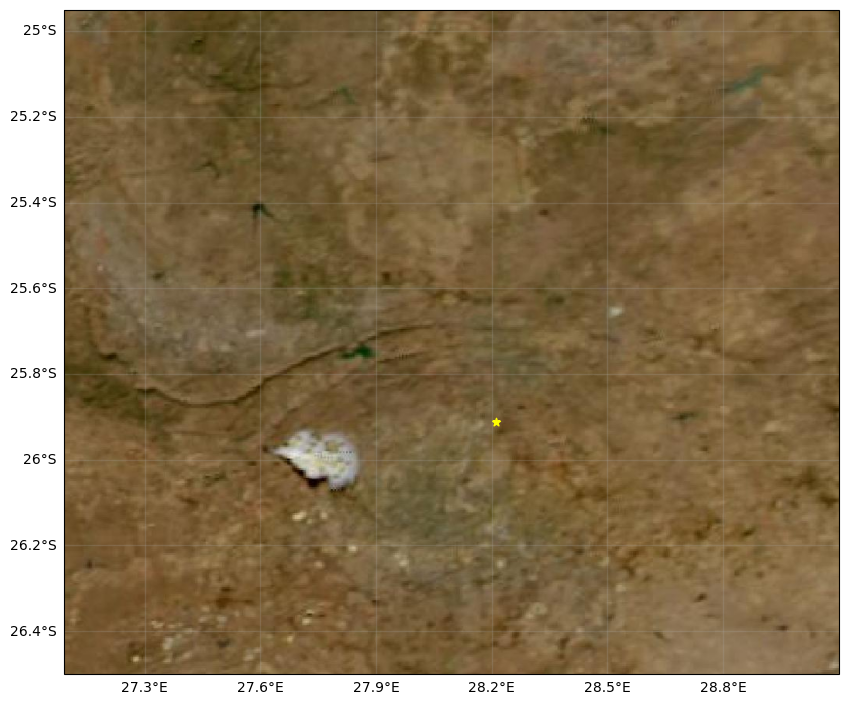

In [3]:
# Construct global image URL.
proj4326 = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
version=1.3.0&service=WMS&request=GetMap&\
format=image/jpeg&STYLE=default&bbox=-26.5,27.09,-24.95,29.1&CRS=EPSG:4326&\
HEIGHT=1000&WIDTH=1000&TIME=2013-06-25&layers=MODIS_Aqua_SurfaceReflectance_Bands143'

# Request image.
img = io.imread(proj4326) 

plt.figure(figsize=(10, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
cmp = plt.imshow(img, transform=ccrs.PlateCarree(), extent=(27.09, 29.1, -26.5, -24.95), origin='upper')

radar.plot(ax=ax, color='yellow', marker='*')

# Draw grid.
gl = ax.gridlines(ccrs.PlateCarree(), linewidth = 1, alpha = 0.2,  draw_labels = True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER



#plt.show()

plt.savefig('Plume_VisiblePlot_20130625.png', dpi=400)

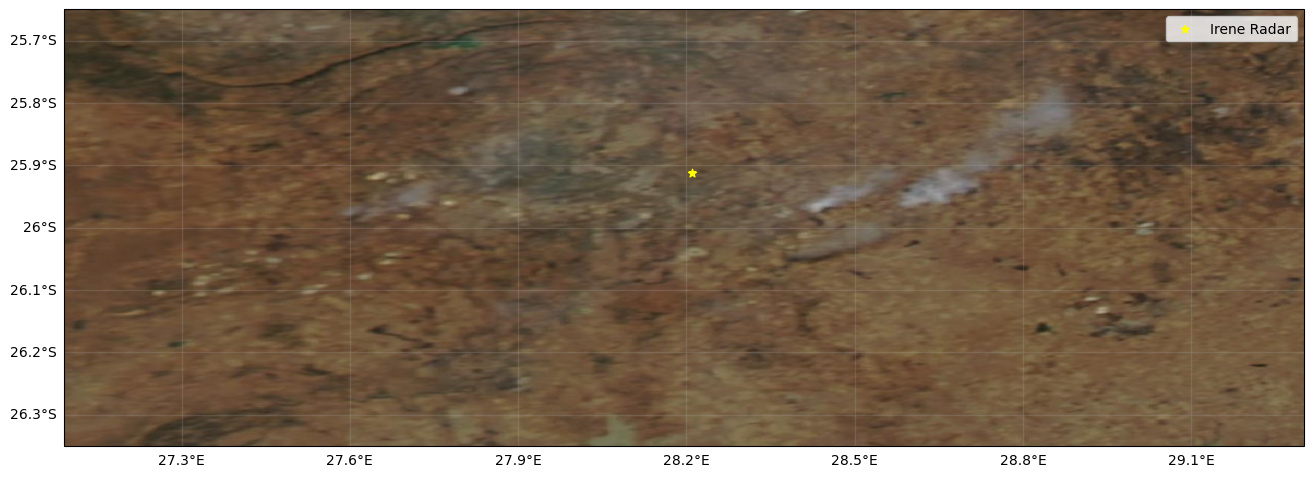

In [18]:
# Construct global image URL.
proj4326 = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
version=1.3.0&service=WMS&request=GetMap&\
format=image/jpeg&STYLE=default&bbox=-26.9,27.09,-25.65,29.5&CRS=EPSG:4326&\
HEIGHT=1200&WIDTH=1200&TIME=2013-06-19&layers=MODIS_Aqua_CorrectedReflectance_TrueColor'

# Request image.
img = io.imread(proj4326) 

plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
cmp = plt.imshow(img, transform=ccrs.PlateCarree(), extent=(27.09, 29.3, -26.35, -25.65), origin='upper')

radar.plot(ax=ax, color='yellow', marker='*', label='Irene Radar')

# Draw grid.
gl = ax.gridlines(ccrs.PlateCarree(), linewidth = 1, alpha = 0.2,  draw_labels = True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.legend()
plt.show()

#plt.savefig('Plume_VisiblePlot_20130625.png', dpi=400)

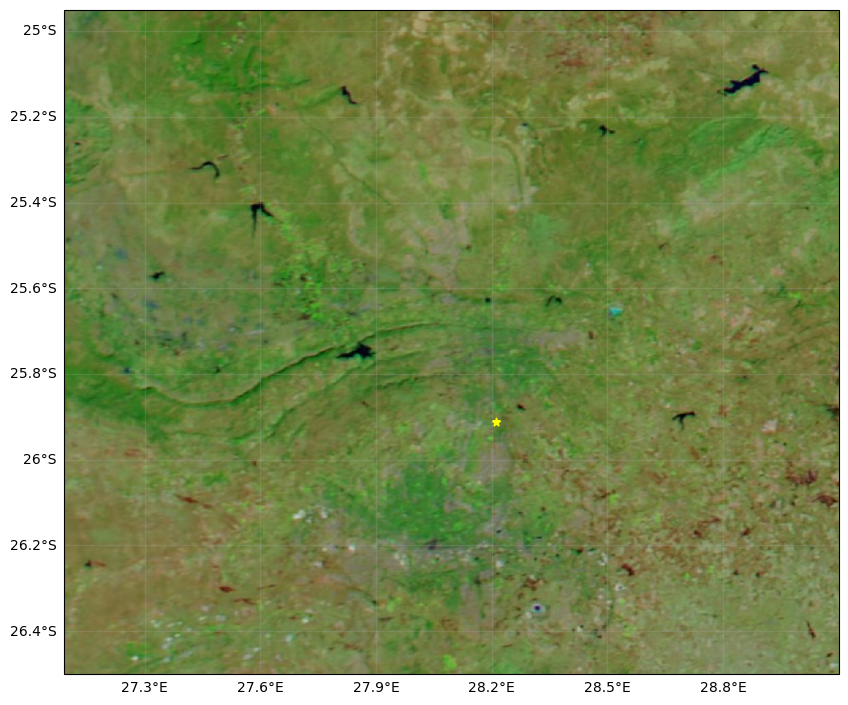

In [61]:
# Construct global image URL.
proj4326 = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
version=1.3.0&service=WMS&request=GetMap&\
format=image/jpeg&STYLE=default&bbox=-26.5,27.09,-24.95,29.1&CRS=EPSG:4326&\
HEIGHT=1200&WIDTH=1200&TIME=2013-06-25&layers=MODIS_Aqua_CorrectedReflectance_Bands721'

# Request image.
img = io.imread(proj4326) 

plt.figure(figsize=(10, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
cmp = plt.imshow(img, transform=ccrs.PlateCarree(), extent=(27.09, 29.1, -26.5, -24.95), origin='upper')

radar.plot(ax=ax, color='yellow', marker='*')

# Draw grid.
gl = ax.gridlines(ccrs.PlateCarree(), linewidth = 1, alpha = 0.2,  draw_labels = True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER



#plt.show()

#plt.savefig('Plume_VisiblePlot_20130625.png', dpi=400)

In [129]:
# Construct WMTS capability URL.
wmtsUrl = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi?SERVICE=WMTS&REQUEST=GetCapabilities'

# Request capabilities.
response = requests.get(wmtsUrl)

# Display capability XML.
WmtsXml = xmltree.fromstring(response.content)

# Uncomment the following to display the large file:
# print(xmltree.tostring(WmtsXml, pretty_print = True, encoding = str))

In [131]:
# Convert capability response to XML tree.
WmtsTree = xmlet.fromstring(response.content)

alllayer = []
layerNumber = 0

# Parse capability XML tree.
for child in WmtsTree.iter():
    for layer in child.findall("./{http://www.opengis.net/wmts/1.0}Layer"): 
         if '{http://www.opengis.net/wmts/1.0}Layer' == layer.tag: 
            f=layer.find("{http://www.opengis.net/ows/1.1}Identifier")
            if f is not None:
                alllayer.append(f.text)
                layerNumber += 1

# Print the first five and last five layers.
print('Number of layers: ', layerNumber)
for one in sorted(alllayer):
    print(one)
print('...')
for one in sorted(alllayer):
    print(one)       

Number of layers:  1100
AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Day
AIRS_L2_Carbon_Monoxide_500hPa_Volume_Mixing_Ratio_Night
AIRS_L2_Cloud_Top_Height_Day
AIRS_L2_Cloud_Top_Height_Night
AIRS_L2_Dust_Score_Day
AIRS_L2_Dust_Score_Night
AIRS_L2_Methane_400hPa_Volume_Mixing_Ratio_Day
AIRS_L2_Methane_400hPa_Volume_Mixing_Ratio_Night
AIRS_L2_RelativeHumidity_500hPa_Day
AIRS_L2_RelativeHumidity_500hPa_Night
AIRS_L2_RelativeHumidity_700hPa_Day
AIRS_L2_RelativeHumidity_700hPa_Night
AIRS_L2_RelativeHumidity_850hPa_Day
AIRS_L2_RelativeHumidity_850hPa_Night
AIRS_L2_Sulfur_Dioxide_Brightness_Temperature_Difference_Day
AIRS_L2_Sulfur_Dioxide_Brightness_Temperature_Difference_Night
AIRS_L2_Surface_Air_Temperature_Day
AIRS_L2_Surface_Air_Temperature_Night
AIRS_L2_Surface_Relative_Humidity_Day
AIRS_L2_Surface_Relative_Humidity_Night
AIRS_L2_Surface_Skin_Temperature_Day
AIRS_L2_Surface_Skin_Temperature_Night
AIRS_L2_Temperature_500hPa_Day
AIRS_L2_Temperature_500hPa_Night
AIRS_L2_Temperature_70

# Examples plot

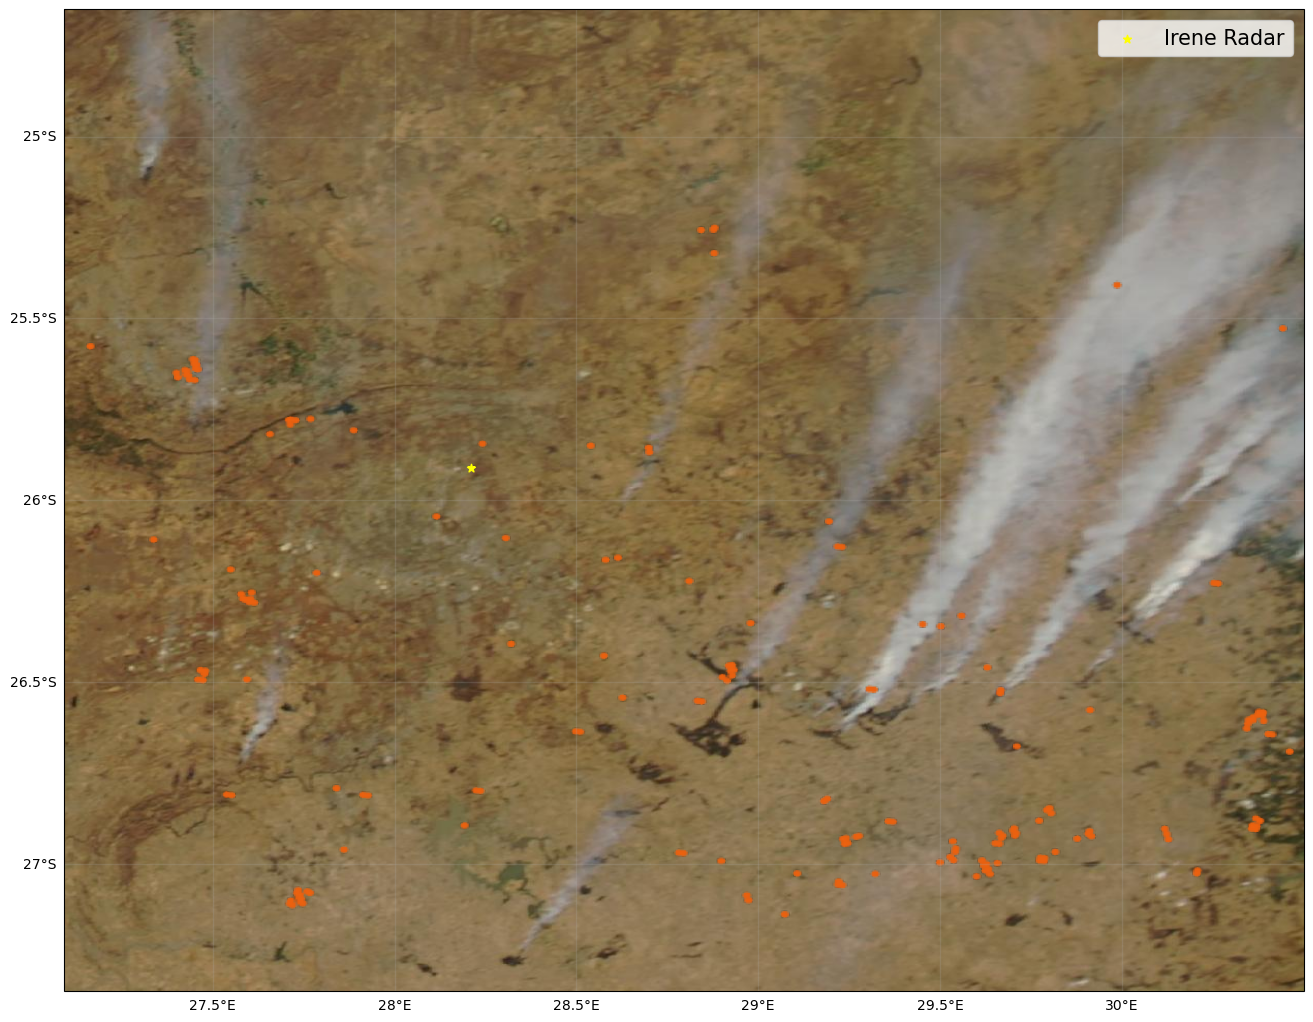

In [135]:
# Construct global image URL.
proj4326 = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
version=1.3.0&service=WMS&request=GetMap&\
format=image/jpeg&STYLE=default&bbox=-27.35,27.09,-24.65,30.5&CRS=EPSG:4326&\
HEIGHT=1200&WIDTH=1200&TIME=2014-08-29&layers=MODIS_Aqua_CorrectedReflectance_TrueColor'

# Request image.
img = io.imread(proj4326) 

# Construct WMS global vector URL.
wmsVector = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
TIME=2014-08-29T00:00:00Z&\
LAYERS=MODIS_Combined_Thermal_Anomalies_All&REQUEST=GetMap&SERVICE=WMS&\
FORMAT=image/png&WIDTH=600&HEIGHT=600&VERSION=1.1.1&SRS=epsg:4326&BBOX=27,-27,30,-24&TRANSPARENT=TRUE'

# Request image.

img2 = io.imread(wmsVector)

plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
cmp = plt.imshow(img, transform=ccrs.PlateCarree(), extent=(27.09, 30.5, -27.35, -24.65), origin='upper')

radar.plot(ax=ax, color='yellow', marker='*', label='Irene Radar')

plt.imshow(img2, transform=ccrs.PlateCarree(), extent=(27.09, 30.5, -27.35, -24.65), origin='upper', label='Thermal Anomalies')

# Draw grid.
gl = ax.gridlines(ccrs.PlateCarree(), linewidth = 1, alpha = 0.2,  draw_labels = True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.legend(fontsize=15)
plt.savefig('Plume_VisiblePlot_20140829.png', dpi=400)

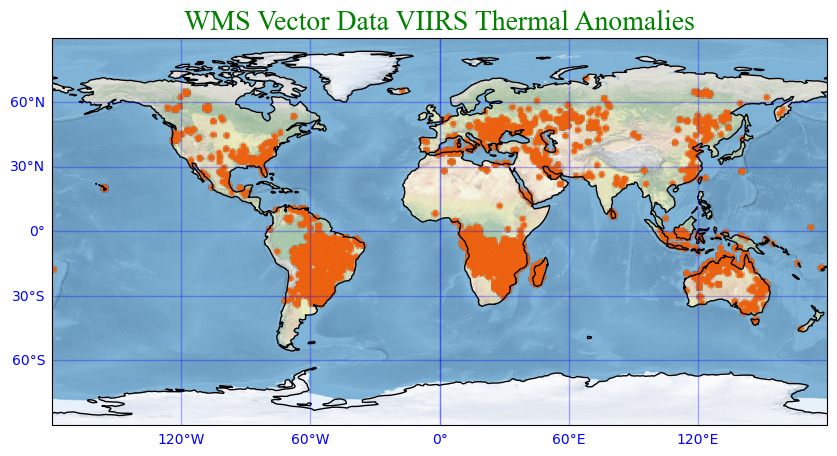

In [101]:
# Construct WMS global vector URL.
wmsVector = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
TIME=2014-08-29T00:00:00Z&\
LAYERS=MODIS_Combined_Thermal_Anomalies_All&REQUEST=GetMap&SERVICE=WMS&\
FORMAT=image/png&WIDTH=480&HEIGHT=240&VERSION=1.1.1&SRS=epsg:4326&BBOX=-180,-90,180,90&TRANSPARENT=TRUE'

# Request image.
img = io.imread(wmsVector)

# Setup map size, projection and background.
fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
ax.set_facecolor("white")
ax.stock_img()
ax.coastlines()

# Draw grid.
gl = ax.gridlines(ccrs.PlateCarree(), linewidth = 1, color = 'blue', alpha = 0.3,  draw_labels = True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([0, 60, 120, -120, -60, 0])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'blue'}
gl.ylabel_style = {'color': 'blue'}

# Display image on map.
extent = (-180, 180, -90, 90)
plt.imshow(img, extent = extent)

plt.title('WMS Vector Data VIIRS Thermal Anomalies',\
          fontname = "Times New Roman", fontsize = 20, color = 'green')

print('')